# 1101 Boundary Value Problem

## 107022138
    
    

## For 1 Dimension
<font size = 4 >
    $$
    V_i = \frac{1}{2}(V_{i+1} + V_{i-1})
    $$
    
    
</font> 

## For 2 Dimension
<font size = 4 >
    $$
    V_{i,j} = \frac{1}{4}(V_{i+1,j} + V_{i-1,j} + V_{i,j+1} + V_{i,j-1})
    $$
</font>
    

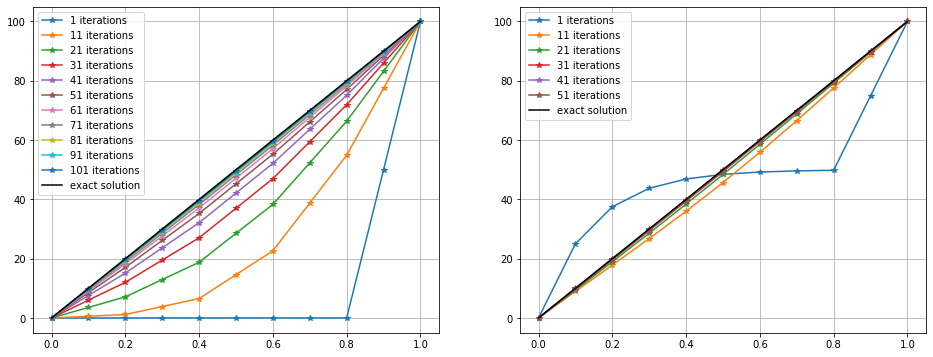

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()

N = 11     # N means the number of equl points
x = np.linspace(0,1,N)
V = np.zeros(N)*50   # initial condition for Jacobi method
V[N-1] = 100
V[0] = 0

A = np.zeros([N,N])
for i in range(1,N-1):
    A[i-1][i] = 1/2
    A[i+1][i] = 1/2

for i in range(10*N):
    V = np.dot(V,A)
    V[N-1] = 100
    V[0] = 0
    if (i%10 == 0):
        ax[0].plot(x,V,'*-',label = str(i+1) + ' iterations' )
ax[0].plot([0,1],[0,100],'k-',label = 'exact solution')


for k in range (6):
    V = np.ones(len(x))*50
    V[len(x)-1] = 100
    V[0] = 0
    for j in range(10*k+1):
        for i in range(len(x)):
            if (i != 0 and i != len(x)-1):
                V[i] = (V[i-1] + V[i+1])/2
    ax[1].plot(x,V,'*-',label = str(10*k+1) + ' iterations')
ax[1].plot([0,1],[0,100],'k-',label = 'exact solution')

ax[1].legend()
ax[1].grid()
ax[0].legend()
ax[0].grid()

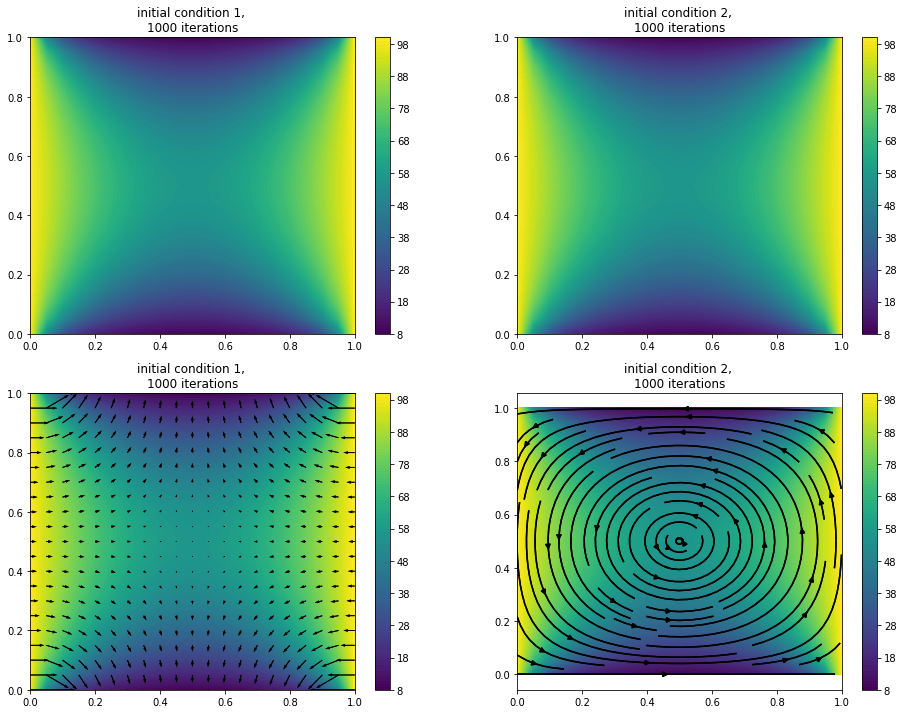

In [100]:
fig, axes = plt.subplots(ncols = 2 , nrows = 2, figsize = (16,12))
ax = axes.flatten()
N = 21     # N means the number of equl points
it = 1000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'ij')
V = np.zeros((N,N))
A = np.zeros((4,N,N))

V[N-1][:] = 0
V[0][:] = 0
V[:][N-1] = 100
V[:][0] = 100

for k in range(4):
    if (k%2 == 1):#  another initial guess
        V[1:N-1][0:N-1] = np.random.random([N-2,N])*50
        
    for i in range(it):
        A[0] = np.delete(np.insert(V,N, values = np.zeros(N),axis = 0),0,axis = 0)
        A[1] = np.delete(np.insert(V,0, values = np.zeros(N),axis = 0),N,axis = 0)
        A[2] = np.delete(np.insert(V,N, values = np.zeros(N),axis = 1),0,axis = 1)
        A[3] = np.delete(np.insert(V,0, values = np.zeros(N),axis = 1),N,axis = 1)

        V = 1/4*(A[0] + A[1] + A[2] + A[3])

        V[N-1][:] = 0
        V[0][:] = 0
        V[:][N-1] = 100
        V[:][0] = 100
    
    contour = ax[k].contourf(X,Y,V,100)
    fig.colorbar(contour, shrink=1.0, aspect=20,ax=ax[k])
    
    ax[k].set_title('initial condition ' + str(k%2 +1) + ', \n' + str(it) + ' iterations')
    if(k > 1):
        Ex, Ey = np.gradient(-V)
        ax[2].quiver(X,Y,Ex,Ey)
        ax[3].streamplot(x,y,Ex,Ey,density = 1,color = 'k')

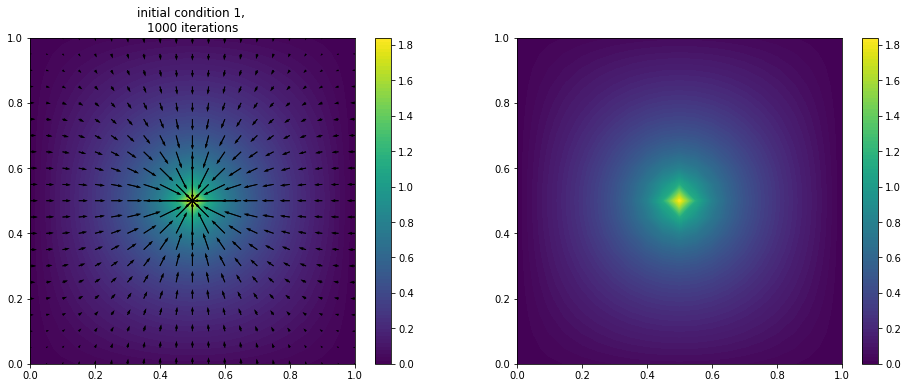

In [104]:
fig, axes = plt.subplots(ncols = 2 , nrows = 1, figsize = (16,6))
ax = axes.flatten()
N = 21     # N means the number of equl points
it = 1000
x = np.linspace(0,1,N)
y = np.linspace(0,1,N)
X, Y = np.meshgrid(x, y, indexing = 'ij')
V = np.zeros((N,N))
A = np.zeros((4,N,N))
ρ = np.zeros((N,N))
ρ[int((N-1)/2)][int((N-1)/2)] = 100
h = (x[N-1]-x[0])/N

V[N-1][:] = 0
V[0][:] = 0
V[:][N-1] = 0
V[:][0] = 0

for k in range(2):
    if (k%2 == 1):#  another guess
        V[1:N-1][0:N-1] = np.random.random([N-2,N])*50
        
    for i in range(it):
        A[0] = np.delete(np.insert(V,N, values = np.zeros(N),axis = 0),0,axis = 0)
        A[1] = np.delete(np.insert(V,0, values = np.zeros(N),axis = 0),N,axis = 0)
        A[2] = np.delete(np.insert(V,N, values = np.zeros(N),axis = 1),0,axis = 1)
        A[3] = np.delete(np.insert(V,0, values = np.zeros(N),axis = 1),N,axis = 1)

        V = 1/4*(A[0] + A[1] + A[2] + A[3]) + np.pi*ρ*h**2

        V[N-1][:] = 0
        V[0][:] = 0
        V[:][N-1] = 0
        V[:][0] = 0
    
    contour = ax[k].contourf(X,Y,V,100)
    fig.colorbar(contour, shrink=1.0, aspect=20,ax=ax[k])
    if (k==0):
        ax[k].set_title('initial condition ' + str(k%2 +1) + ', \n' + str(it) + ' iterations')
    Ex, Ey = np.gradient(V)
    ax[0].quiver(X,Y,Ex,Ey)
#     ax[0].streamplot(x,y,Ex,Ey,density = 1,color = 'k')